In [8]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [5]:
df = pd.read_csv("Diwali Sales Data.csv", encoding='ISO-8859-1')



In [6]:
df.head()

,User_ID,Cust_name,Product_ID,Gender,Age Group,Age,Marital_Status,State,Zone,Occupation,Product_Category,Orders,Amount,Status,unnamed1
0,1002903,Sanskriti,P00125942,F,26-35,28,0,Maharashtra,Western,Healthcare,Auto,1,23952.0,NaN,NaN
1,1000732,Kartik,P00110942,F,26-35,35,1,Andhra Pradesh,Southern,Govt,Auto,3,23934.0,NaN,NaN
2,1001990,Bindu,P00118542,F,26-35,35,1,Uttar Pradesh,Central,Automobile,Auto,3,23924.0,NaN,NaN
3,1001425,Sudevi,P00237842,M,0-17,16,0,Karnataka,Southern,Construction,Auto,2,23912.0,NaN,NaN
4,1000588,Joni,P00057942,M,26-35,28,1,Gujarat,Western,Food Processing,Auto,2,23877.0,NaN,NaN


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11251 entries, 0 to 11250
Data columns (total 15 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   User_ID           11251 non-null  int64  
 1   Cust_name         11251 non-null  object 
 2   Product_ID        11251 non-null  object 
 3   Gender            11251 non-null  object 
 4   Age Group         11251 non-null  object 
 5   Age               11251 non-null  int64  
 6   Marital_Status    11251 non-null  int64  
 7   State             11251 non-null  object 
 8   Zone              11251 non-null  object 
 9   Occupation        11251 non-null  object 
 10  Product_Category  11251 non-null  object 
 11  Orders            11251 non-null  int64  
 12  Amount            11239 non-null  float64
 13  Status            0 non-null      float64
 14  unnamed1          0 non-null      float64
dtypes: float64(3), int64(4), object(8)
memory usage: 1.3+ MB


In [10]:
df.shape

(11251, 15)

In [11]:
df.describe()

,User_ID,Age,Marital_Status,Orders,Amount,Status,unnamed1
count,1.125100e+04,11251.000000,11251.000000,11251.000000,11239.000000,0.0,0.0
mean,1.003004e+06,35.421207,0.420318,2.489290,9453.610858,NaN,NaN
std,1.716125e+03,12.754122,0.493632,1.115047,5222.355869,NaN,NaN
min,1.000001e+06,12.000000,0.000000,1.000000,188.000000,NaN,NaN
25%,1.001492e+06,27.000000,0.000000,1.500000,5443.000000,NaN,NaN
50%,1.003065e+06,33.000000,0.000000,2.000000,8109.000000,NaN,NaN
75%,1.004430e+06,43.000000,1.000000,3.000000,12675.000000,NaN,NaN
max,1.006040e+06,92.000000,1.000000,4.000000,23952.000000,NaN,NaN


### DATA CLEANING

In [13]:
# Drop the blank columns Status & unnamed

df.drop(['Status','unnamed1'] , axis =1 , inplace = True)



In [14]:
df.head()

,User_ID,Cust_name,Product_ID,Gender,Age Group,Age,Marital_Status,State,Zone,Occupation,Product_Category,Orders,Amount
0,1002903,Sanskriti,P00125942,F,26-35,28,0,Maharashtra,Western,Healthcare,Auto,1,23952.0
1,1000732,Kartik,P00110942,F,26-35,35,1,Andhra Pradesh,Southern,Govt,Auto,3,23934.0
2,1001990,Bindu,P00118542,F,26-35,35,1,Uttar Pradesh,Central,Automobile,Auto,3,23924.0
3,1001425,Sudevi,P00237842,M,0-17,16,0,Karnataka,Southern,Construction,Auto,2,23912.0
4,1000588,Joni,P00057942,M,26-35,28,1,Gujarat,Western,Food Processing,Auto,2,23877.0


In [15]:
df.isnull().sum()

User_ID              0
Cust_name            0
Product_ID           0
Gender               0
Age Group            0
Age                  0
Marital_Status       0
State                0
Zone                 0
Occupation           0
Product_Category     0
Orders               0
Amount              12
dtype: int64

In [16]:
df.dropna(inplace=True)

In [17]:
df.isnull().sum()

User_ID             0
Cust_name           0
Product_ID          0
Gender              0
Age Group           0
Age                 0
Marital_Status      0
State               0
Zone                0
Occupation          0
Product_Category    0
Orders              0
Amount              0
dtype: int64

In [ ]:
# Change the dataype of "Amount " to int

In [18]:
df['Amount']= df['Amount'].astype('int')

In [19]:
df['Amount'].dtype

dtype('int32')

In [20]:
df.columns

Index(['User_ID', 'Cust_name', 'Product_ID', 'Gender', 'Age Group', 'Age',
       'Marital_Status', 'State', 'Zone', 'Occupation', 'Product_Category',
       'Orders', 'Amount'],
      dtype='object')

### EDA

#### GENDER DISTRIBUTION

In [ ]:
# Count of Genders 

In [37]:
df['Gender'].value_counts()

F    7832
M    3407
Name: Gender, dtype: int64

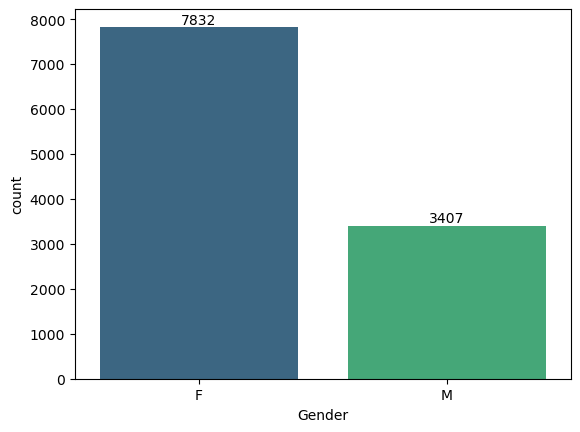

In [112]:
ax = sns.countplot(x='Gender', data = df ,palette='viridis')
for bars in ax.containers:
    ax.bar_label(bars)

#### SALES BY GENDER 

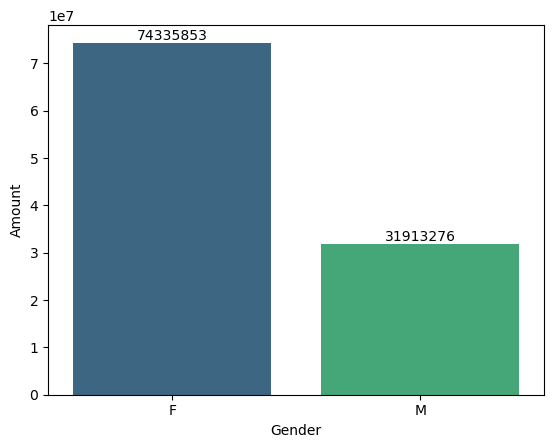

In [111]:
sales_gen=df.groupby(['Gender'],as_index=False)['Amount'].sum().sort_values(by="Amount", ascending = False)



ax=sns.barplot(data=sales_gen, x='Gender',y='Amount',palette='viridis')

for index,value in enumerate(sales_gen['Amount']):
    ax.text (index,value,f'{value:.0f}',ha='center',va='bottom',fontsize=10,color='black')

In [84]:
sales_gen

,Gender,Amount
0,F,74335853
1,M,31913276


##### Since there are higher number of female in the distribution hence they contribute significantly higher amount to the sales 

#### AGE DISTRIBUTION

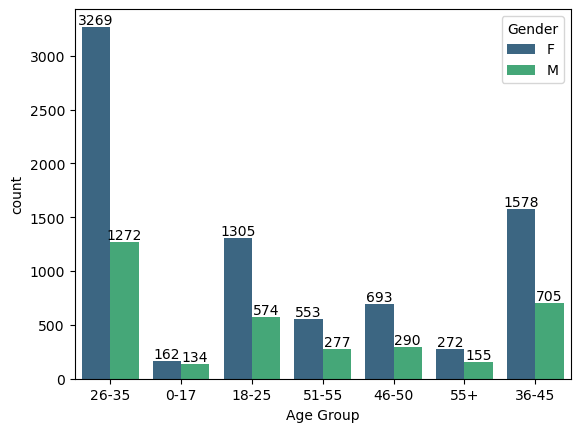

In [110]:
ax=sns.countplot(x="Age Group", hue="Gender", data=df, palette='viridis')
for bars in ax.containers:
    ax.bar_label(bars)

#### SALES BY AGE GROUP

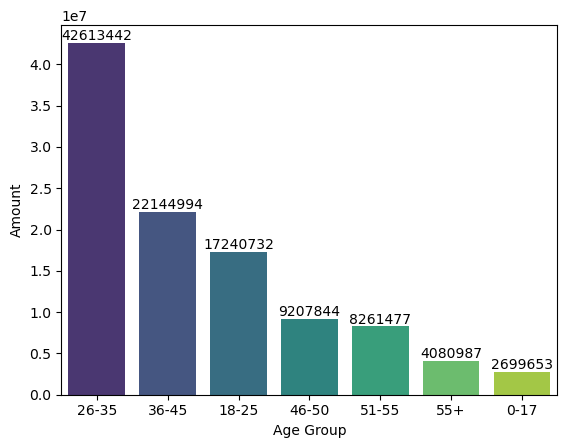

In [109]:
sales_gen_ag=df.groupby(['Age Group'],as_index=False)['Amount'].sum().sort_values(by="Amount", ascending=False)

ax = sns.barplot(x='Age Group', y='Amount', data=sales_gen_ag, palette='viridis')

# Add data labels to the bars
for index, value in enumerate(sales_gen_ag['Amount']):
    ax.text(index, value, f'{value:.0f}', fontsize=10, ha='center', va='bottom',color='black')

In [60]:
sales_gen_ag

,Age Group,Amount
2,26-35,42613442
3,36-45,22144994
1,18-25,17240732
4,46-50,9207844
5,51-55,8261477
6,55+,4080987
0,0-17,2699653


##### From the above graph it can be concluded that the age group between 26-35 have contributed higher to the sales 

#### ORDERS BY STATE

In [114]:
orders_st=df.groupby(['State'],as_index=False)['Orders'].sum().sort_values(by='Orders', ascending= False)

In [115]:
orders_st

,State,Orders
14,Uttar Pradesh,4807
10,Maharashtra,3810
7,Karnataka,3240
2,Delhi,2740
9,Madhya Pradesh,2252
0,Andhra Pradesh,2051
5,Himachal Pradesh,1568
8,Kerala,1137
4,Haryana,1109
3,Gujarat,1066


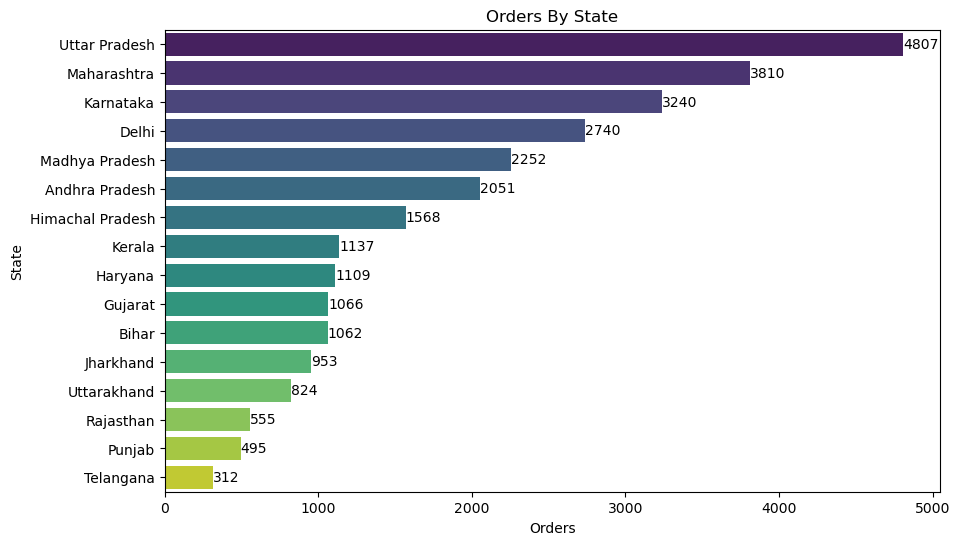

In [126]:
plt.figure(figsize=(10,6))
ax=sns.barplot(data=orders_st, x='Orders', y='State',palette='viridis')
plt.xlabel("Orders")
plt.ylabel("State")
plt.title("Orders By State")

for index,value in enumerate(orders_st['Orders']):
    ax.text(value,index,f'{value:.0f}',va='center',fontsize=10,color='black')
plt.show()

#### SALES BY STATE

In [87]:
sales_st=df.groupby(['State'],as_index=False)['Amount'].sum().sort_values(by="Amount", ascending= False)

In [88]:
sales_st

,State,Amount
14,Uttar Pradesh,19374968
10,Maharashtra,14427543
7,Karnataka,13523540
2,Delhi,11603818
9,Madhya Pradesh,8101142
0,Andhra Pradesh,8037146
5,Himachal Pradesh,4963368
4,Haryana,4220175
1,Bihar,4022757
3,Gujarat,3946082


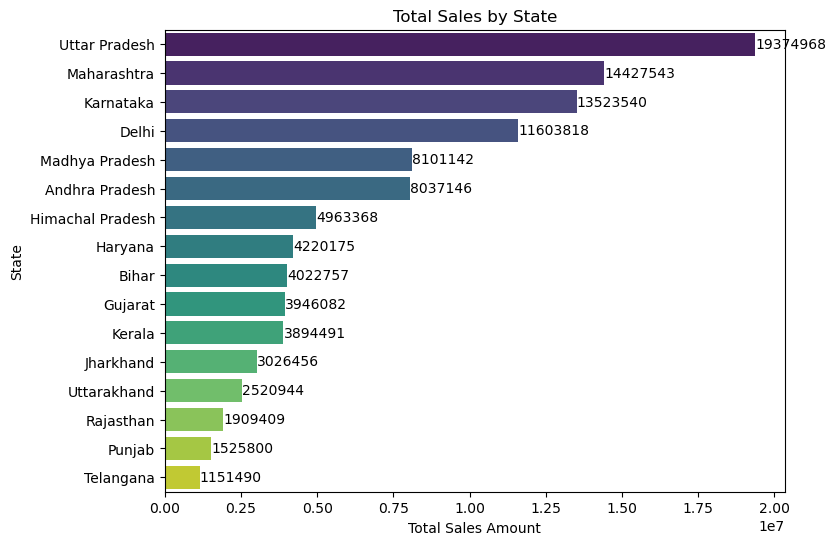

In [133]:
plt.figure(figsize=(8,6))


ax=sns.barplot(data=sales_st , x="Amount",y='State',palette='viridis')

plt.xlabel('Total Sales Amount')
plt.ylabel('State')
plt.title('Total Sales by State')

for index,value in enumerate(sales_st['Amount']):
    ax.text(value,index, f'{value:.0f}',va= 'center',fontsize=10,color='black')
    
plt.show()

In [ ]:
# for top 5 State by sales 

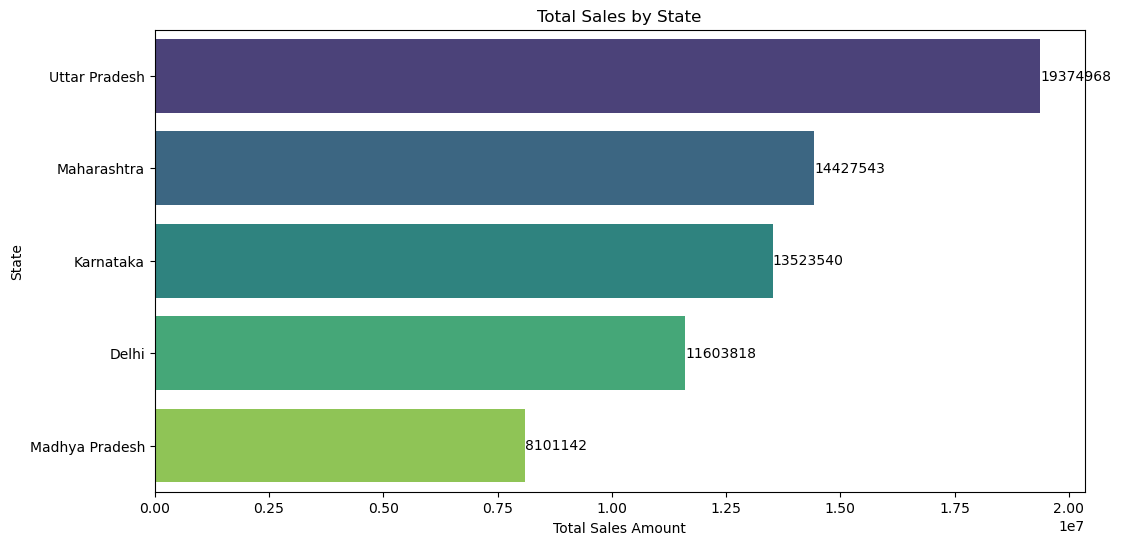

In [140]:
sales_st5=df.groupby(['State'],as_index=False)['Amount'].sum().sort_values(by="Amount", ascending= False).head(5)

plt.figure(figsize=(12,6))


ax=sns.barplot(data=sales_st5 , x="Amount",y='State',palette='viridis')

plt.xlabel('Total Sales Amount')
plt.ylabel('State')
plt.title('Total Sales by State')

for index,value in enumerate(sales_st5['Amount']):
    ax.text(value,index, f'{value:.0f}',va= 'center',fontsize=10,color='black')
    
plt.show()

##### From the above Plots we can clearly see that Uttar Pradesh is the state with highest sales followed by Maharashtra, Karnataka, Delhi & Madhyapradesh

#### DISTRIBUTION BY MARITAL STATUS 

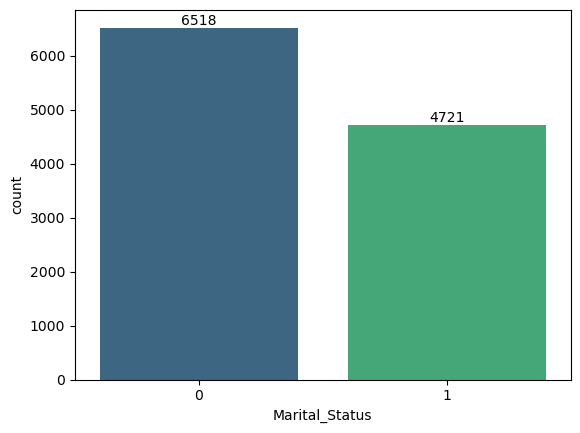

In [143]:
ax=sns.countplot(data=df , x='Marital_Status' , palette='viridis')
for bars in ax.containers:
    ax.bar_label(bars)


##### Here 0 is the count of Unmarried and 1 is the count of Married Customers 

In [154]:
sales_ms=df.groupby(['Marital_Status'], as_index=False)['Amount'].sum().sort_values(by="Amount", ascending=False)

sales_ms

,Marital_Status,Amount
0,0,62125384
1,1,44123745


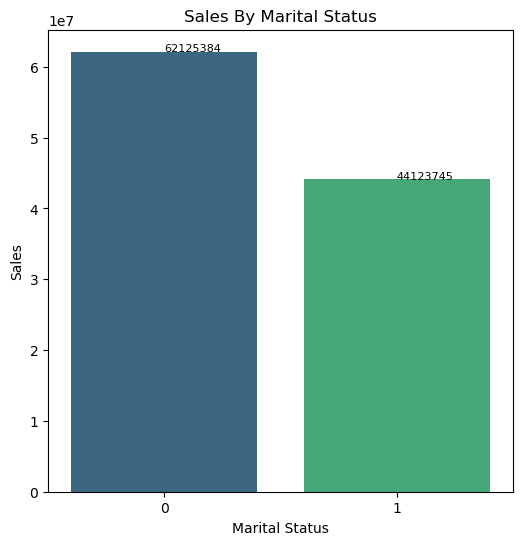

In [159]:
plt.figure(figsize=(6,6))

ax=sns.barplot(data= sales_ms , x= 'Marital_Status', y='Amount', palette='viridis')

plt.xlabel('Marital Status')
plt.ylabel('Sales')
plt.title('Sales By Marital Status')


for index , value in enumerate(sales_ms['Amount']):
    ax.text(index, value , f'{value:.0f}', fontsize=8,color='black')
plt.show()


##### It is evident from the above graph that Unmarried Customers have contributed more to the sales 

#### DISTRIBUTION OF  DIFFERENT  OCCUPATION

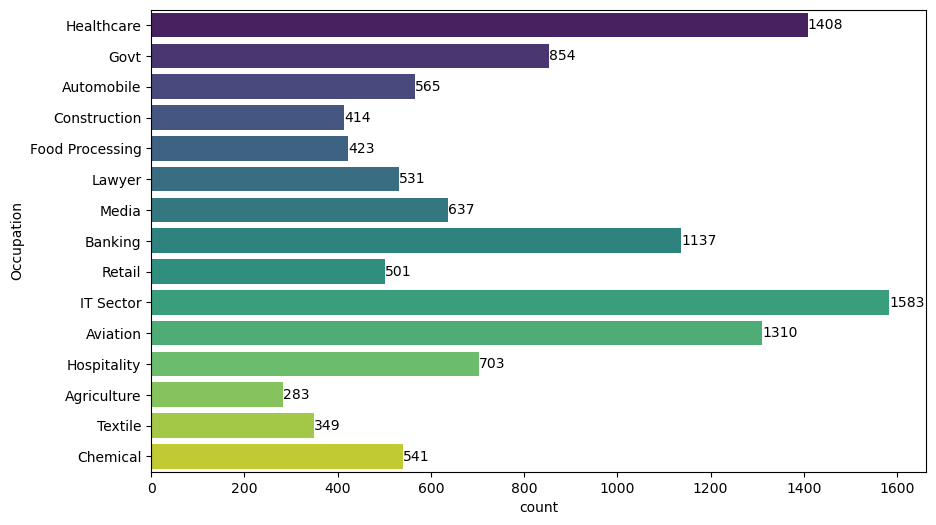

In [178]:
plt.figure(figsize=(10,6))
ax=sns.countplot(data=df, y='Occupation',palette='viridis')
for bars in ax.containers :
    ax.bar_label(bars)
plt.show()

#### DIFFERENT OCCUPATION CONTRIBUTING TO SALES 

In [181]:
sales_oc=df.groupby(['Occupation'],as_index=False)['Amount'].sum().sort_values(by='Amount',ascending=False)
sales_oc

,Occupation,Amount
10,IT Sector,14755079
8,Healthcare,13034586
2,Aviation,12602298
3,Banking,10770610
7,Govt,8517212
9,Hospitality,6376405
12,Media,6295832
1,Automobile,5368596
4,Chemical,5297436
11,Lawyer,4981665


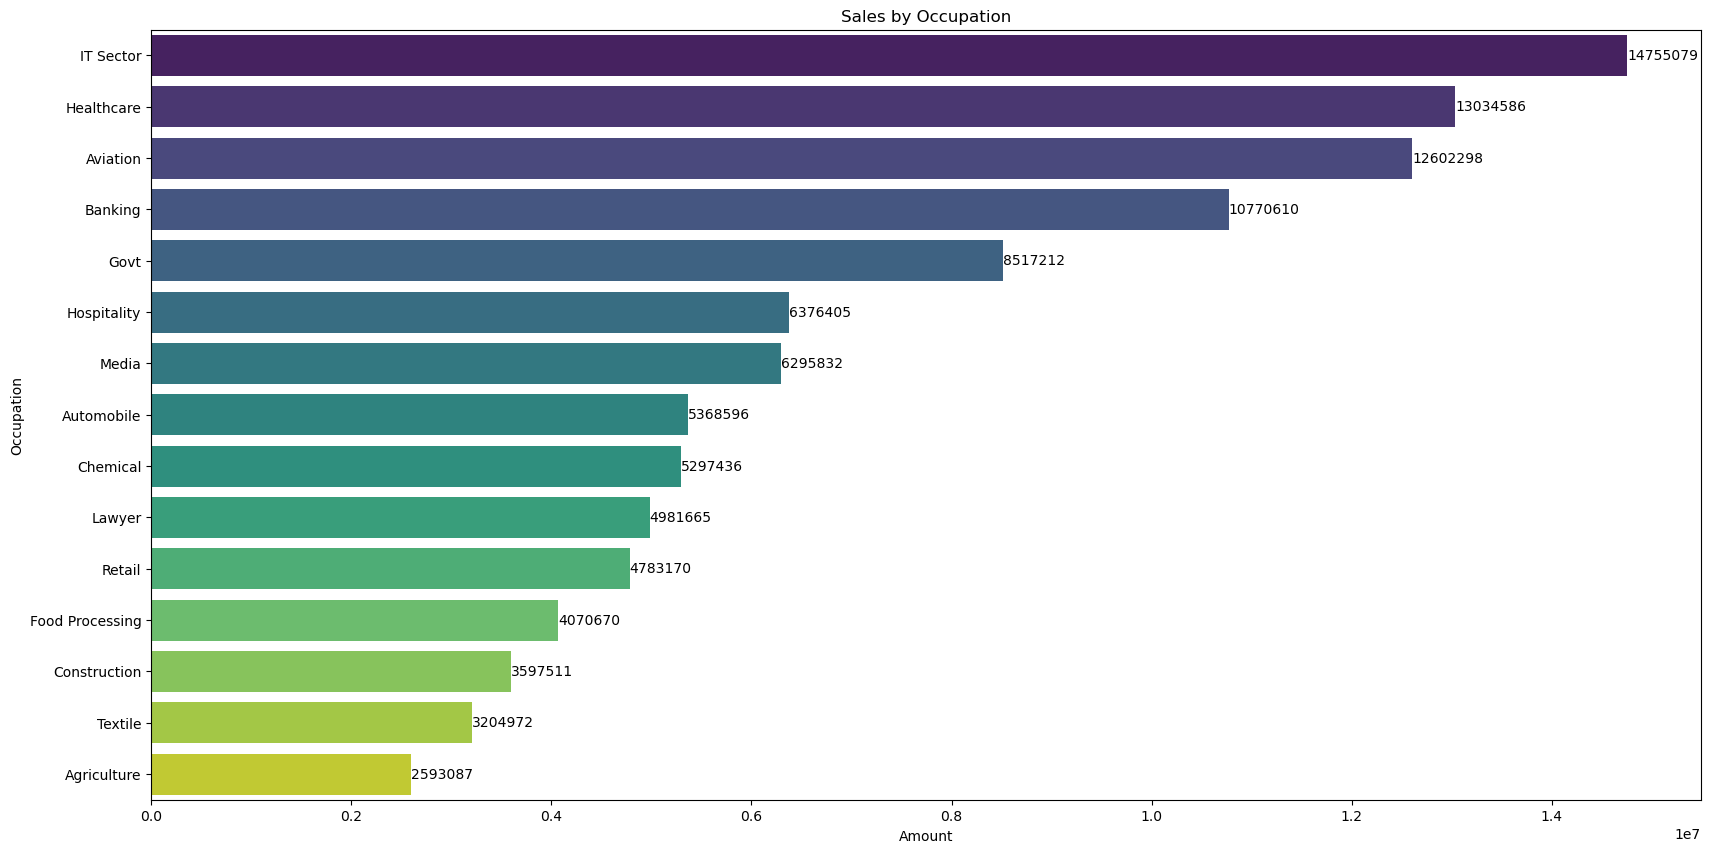

In [187]:
plt.figure(figsize=(20,10))

ax=sns.barplot(data=sales_oc, x='Amount',y='Occupation',palette='viridis')
plt.xlabel('Amount')
plt.ylabel('Occupation')
plt.title('Sales by Occupation')

for index,value in enumerate(sales_oc['Amount']):
    ax.text(value, index,f'{value:.0f}',va='center',fontsize=10,color='black')
plt.show()


##### So the customers working in IT sector have contributed most to the sales followed by Healthcare and aviation

#### PRODUCT CATEGORIES 

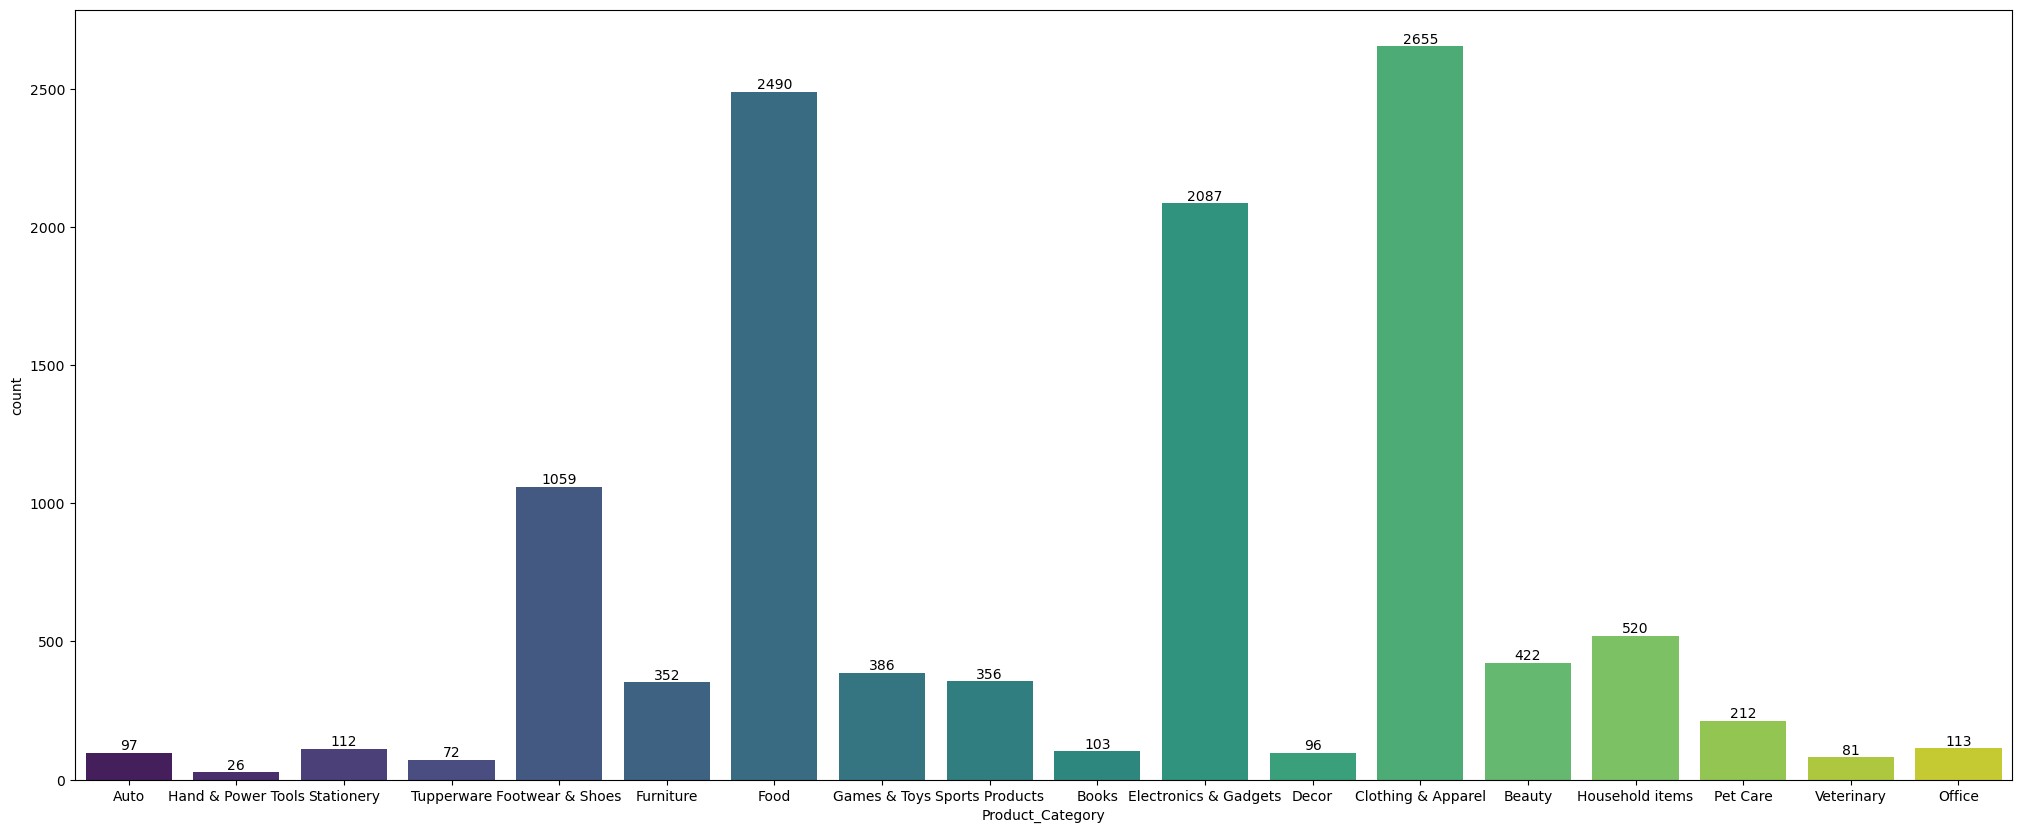

In [210]:
plt.figure(figsize=(25,10))

ax=sns.countplot(data=df, x='Product_Category',palette='viridis')
for bars in ax.containers :
    ax.bar_label(bars)
plt.show()

#### SALES BY TOP 10 PRODUCT CATEGORY

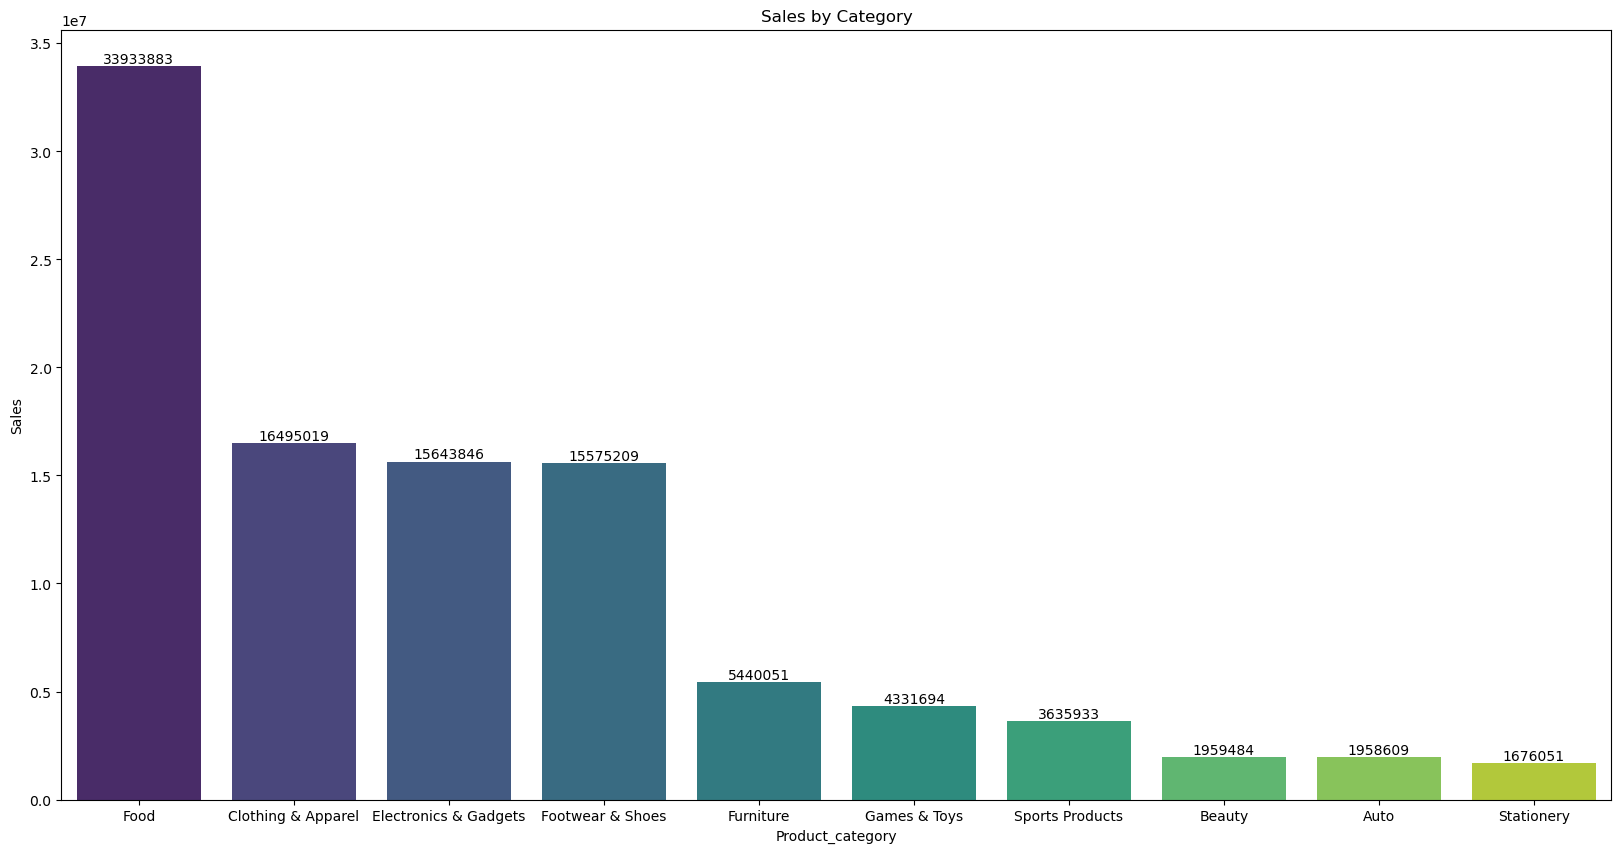

In [222]:
sales_pc=df.groupby(['Product_Category'],as_index= False)['Amount'].sum().sort_values(by='Amount',ascending=False).head(10)
sales_pc

plt.figure(figsize=(20,10))
ax=sns.barplot(data=sales_pc,x='Product_Category',y='Amount',palette='viridis')

plt.xlabel('Product_category')
plt.ylabel('Sales')
plt.title('Sales by Category')

for index,value in enumerate(sales_pc['Amount']):
    ax.text(index,value ,f'{value:.0f}',ha='center',va='bottom', fontsize=10,color='black')
plt.show()


##### Althogh Clothing and Apparel was the most ordered item but from the chart above we can clearly see that  food is the most ordered item 